# EX 7

### EX 1

Given the problem of the lightouse discussed last week, study the case in which both the positionalong the shore ($\alpha$) and the distance out at sea ($\beta$) are unknown.

As was the case with just $\alpha$ unknown, the problem of determining the parameters given the data amounts to maximizing the posterior, according to Bayes' theorem: given $N$ data points $\{x_k\}$,

$$
P(\alpha,\beta|\{x_k\}) \propto P(\{x_k\}|\alpha,\beta) \cdot P(\alpha, \beta)
$$

where $P(\alpha, \beta)$ denotes the prior of the two parameters. If we make the assumption that $\alpha \perp \beta$, then we can regardthem as independent, and so go on to make the following simplifying assumption:

$$
P(\alpha, \beta) =P(\alpha)\cdot P(\beta)
$$

so that in the end we get

$$
P(\alpha,\beta|\{x_k\}) \propto P(\{x_k\}|\alpha,\beta) \cdot P(\alpha) \cdot P(\beta)
$$

Following the same line of thought employed in the case where only $\alpha$ is unknown, we get the following expression for the likelihood of a data point (the conversion from the uniformly spread angles, $\theta$, to the respective positions, $x$, is already performed):

$$
P(\{x_k\}|\alpha,\beta) = \frac{1}{\pi} \frac{\beta}{\beta^2+\left( x-\alpha \right)^2}
$$

The prior for $\alpha$ is the same as the one parameter case, namely

$$
P(\alpha) = 
\begin{cases}
    \frac{1}{x_{max}-x_{min}} \quad &\text{ for } \alpha \in [x_{min},x_{max}]\\
    0 \quad &\text{otherwise}
\end{cases}
$$

When it comes to $\beta$, we can once again assume a (mostly) non informative prior, 

$$
P(\beta) = 
\begin{cases}
    \frac{1}{MAX} \quad &\text{ for } \beta \in [0,MAX]\\
    0 \quad &\text{otherwise}
\end{cases}
$$

where $MAX$ denotes, in a generic way, the maximum value we are willing to give $\beta$. It should be linked to some measure of likelihood of the spread (as the likelihood of the data is a Cauchy distribution, the FWHM of which is parameterized by $2\beta$). For example, one may take $MAX \approx 2(x_{max}-x_{min})$. This is the assumption we will follow.

In [2]:
library('lattice')

Warning message:
"package 'lattice' was built under R version 3.5.3"

In [3]:
# setting the parameters
alpha <- 2
beta <- 5
set.seed(1206078)

In [4]:
# drawing points according to the likelihood
draw_points <- function(n, a=alpha, b=beta){
    theta <- runif(n, min=-pi/2, max=pi/2)
    x <- a + b*tan(theta)    
    return(x)
}

# given some data, this function computes the log-likelihood for a given couple (alpha,beta)
log_likelihood <- function(a, b, data){
    val <- sum(-log(pi)+log(b)-log(b**2+(data-a)**2))
    return(val)
}

post <- Vectorize(function(a,b) log_likelihood(a, b, pts))

In [5]:
#drawing num points
num <- 15
pts <- draw_points(num, alpha, beta)

#setting the limits of the priors
amin <- min(pts)
amax <- max(pts)
betamin <- 0.01
betamax <- (amax-amin)/2

In [6]:
#creating the vectors of alpha and beta
alphagrid <- seq(amin, amax, leng=100)
betagrid <- seq(betamin, betamax, leng=100)

data <- expand.grid(x = alphagrid, y = betagrid)
data$z <- exp(post(data$x,data$y))
norm <- sum(data$z)
data$z <- data$z/norm
names(data) <- c('x','y','z')

In [7]:
max_post <- which.max(data$z)
alpha_max <- data[max_post,1]
beta_max <- data[max_post,2]
cat("Alpha (MAP) =", alpha_max)
cat("\nBeta (MAP) =", beta_max)

Alpha (MAP) = 2.686387
Beta (MAP) = 5.950753

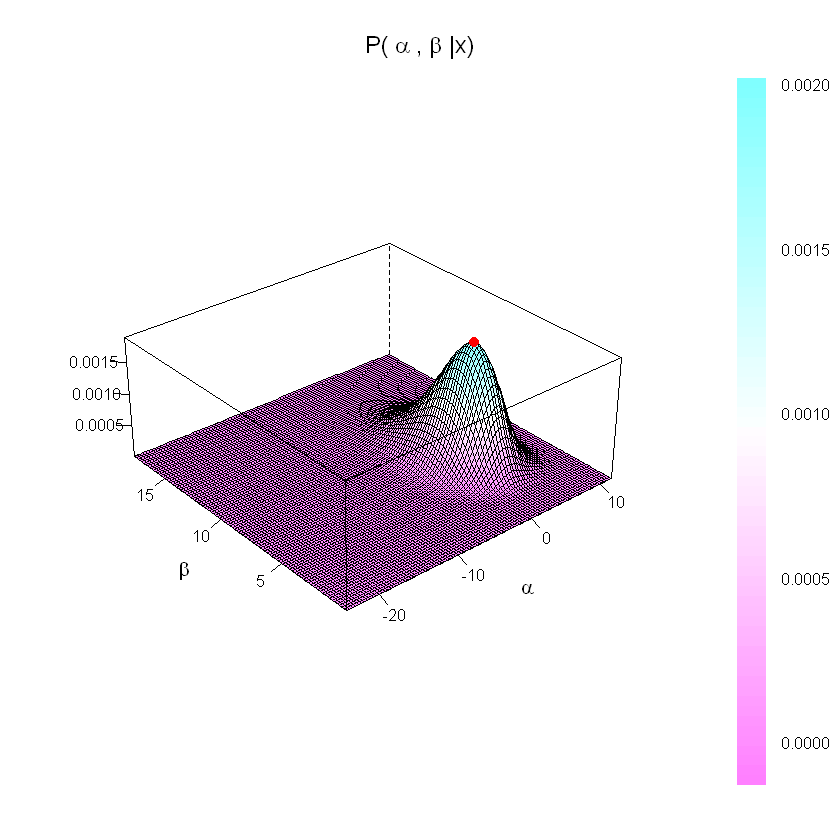

In [14]:
pts <- data[max_post,]


wireframe(z ~ x * y, data,
          xlab=bquote(alpha), ylab = bquote(beta), main=bquote("P("~alpha~','~beta~"|x)"), zlab="",
    drape = T, 
    aspect = c(1, .4), 
    scales = list( arrows = FALSE, col="black"),
    par.settings = list(axis.line = list(col = 'transparent')),
          pts = pts,
          panel.3d.wireframe =
          function(x, y, z,
                   xlim, ylim, zlim,
                   xlim.scaled, ylim.scaled, zlim.scaled,
                   pts,
                   ...) {
              panel.3dwire(x = x, y = y, z = z,
                           xlim = xlim,
                           ylim = ylim,
                           zlim = zlim,
                           xlim.scaled = xlim.scaled,
                           ylim.scaled = ylim.scaled,
                           zlim.scaled = zlim.scaled,
                           ...)
              xx <- xlim.scaled[1] + diff(xlim.scaled) *
                      (pts$x - xlim[1]) / diff(xlim)
              yy <- ylim.scaled[1] + diff(ylim.scaled) *
                      (pts$y - ylim[1]) / diff(ylim)
              zz <- zlim.scaled[1] + diff(zlim.scaled) *
                      (pts$z - zlim[1]) / diff(zlim)
              panel.3dscatter(x = xx,
                              y = yy,
                              z = zz,
                              xlim = xlim,
                              ylim = ylim,
                              zlim = zlim,
                              xlim.scaled = xlim.scaled,
                              ylim.scaled = ylim.scaled,
                              zlim.scaled = zlim.scaled,
                              pch=19, cex=1, col.point='red',
                              ...)
          })

In [15]:
# given a grid of values of alpha and beta, this function returns the likelihood
map_likelihood <- function(data = pts, alpha, beta){
    map <- sapply(alpha, function(i) sapply(beta, function(j) log_likelihood(data, i, j)))
    return(exp(map))
}

### EX 2

Given the Signal over Background example discussed last week, analyzed and discuss the following cases:
1. vary the sampling resolution of used to generate the data, keeping the same sampling range: ```xdat <- seq(from=-7*w, to=7*w, by=0.5*w)```


- change the resolution $w=\{0.1,0.25,1,2,3\}$
- Check the effect on the results


2. Change the ratio $A/B$ used to simulate the data (keeping both positive in accordance with the prior)


- Check the effect on the results

Given a set of counts $\{N_k\}$, masured at values $\{x_k\}$ we want the best estimate of the amplitude of the signal peak and of the background staying below. For instance, in case of a photon spectrum, we measure the number of photons in bins of wavelength or energy. This number is proportional to the exposure (time of measurement) and to both signal and background amplitudes through the expression

$$
S_k = \Delta t \left[ A \exp \left( - \frac{(x_k-x_0)^2}{2w^2}\right) + B\right]
$$

where $\Delta t$ is the exposure time and $x_0$ and $w$ are the centre and width of the signal peak.
The number of expected photons is $S_k$, not generally an integer; the number of observed photons, $D$, is an integer number and follows the Poisson distribution

$$
P(N|S)=\frac{S^N e^{-S_k}}{N!}
$$

and this gives us the Likelihood of the data

$$
P(D|A,B,M) = \prod_j \frac{S_k^{N_k} e^{-S_k}}{N_k!}
$$

We implicitly assume the parameters $\Delta t$, $w$ and $x_0$ to be fixed and known. The problem then amounts to finding the two parameters $A$ and $B$. In the notation above, then, $M$ denotes the model (the shape of the line and the values of the fixed parameters).
What we want to know is then the posterior, which according to Bayes' theorem is

$$
P(A,B|D,M) \propto P(D|A,B,M) \cdot P(A,B|M) 
$$

where $P(A,B|M)$ denotes the prior of the parameters we wish to find. Keeping the assumption simple, we only require both $A$ and $B$ to be positive (as they are amplitudes); this yields a prior which is constant when both the parameters are positive and 0 otherwise. The posterior is then

$$
P(A,B|D,M) = \frac{1}{Z} \prod_k \frac{S_k^{N_k} e^{-S_k}}{N_k!}
$$

and, conversely, the log-posterior is 

$$
L = \log P(A,B|D,M) = \text{const.} + \sum_k \left[ N_k \log S_k - S_k\right]
$$

where all terms which do not depend on either $A$ or $B$ are absorbed in the $\text{const.}$ term.
Then, the problem amounts to maximizing this log-posterior.

###### Varying the resolution $w$

In [77]:
# fixed parameters
x_0 <- 0                #signal peak
w <- c(0.1,0.25,1,2,3)  #signal widths 
A_true <- 2             #signal amplitude
B_true <- 1             #background amplitude
deltat <- 5             #exposure time
samp_width <- 1

In [94]:
# creating the signal
signal <- function(x, a, b, x_0, w, deltat){
    return(deltat*(a*exp(-(x-x_0)**2/(2*w*w))+b))
}

#calculating the log posterior
log_posterior <- function(d, x, a, b, x_0, w, deltat){
    if(a<0 || b<0){return(-Inf)}
    sum(dpois(d, lambda=signal(x, a, b, x_0, w, deltat), log=TRUE))
}

log_post <- Vectorize(function(a,b,w) log_posterior(ddat, xdat, a, b, x_0, w, deltat))

In [95]:
#setting the seed
set.seed(1206078)

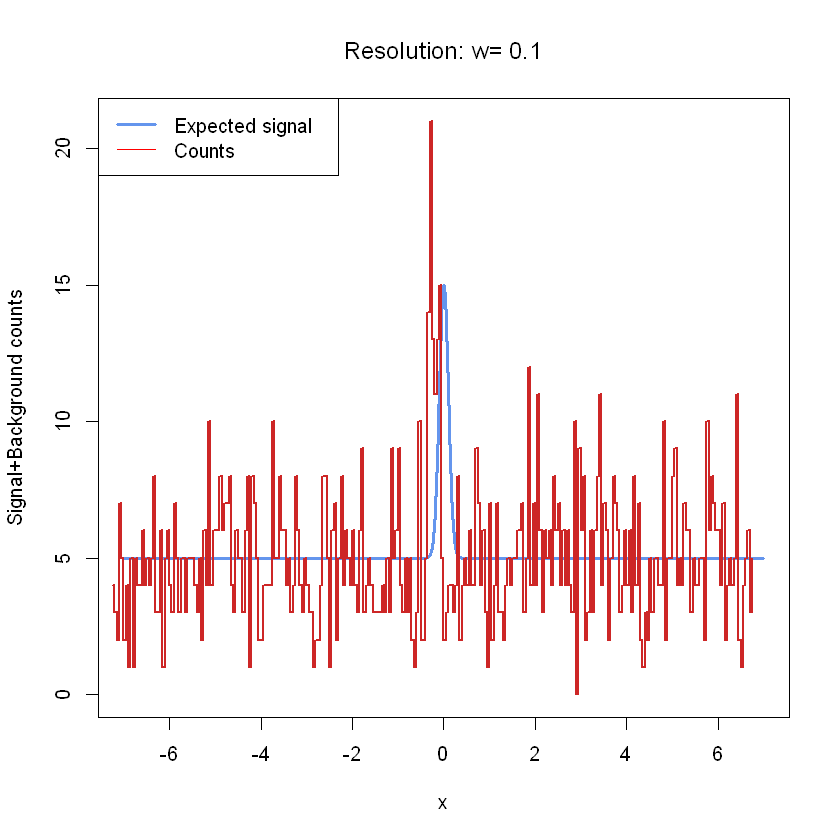

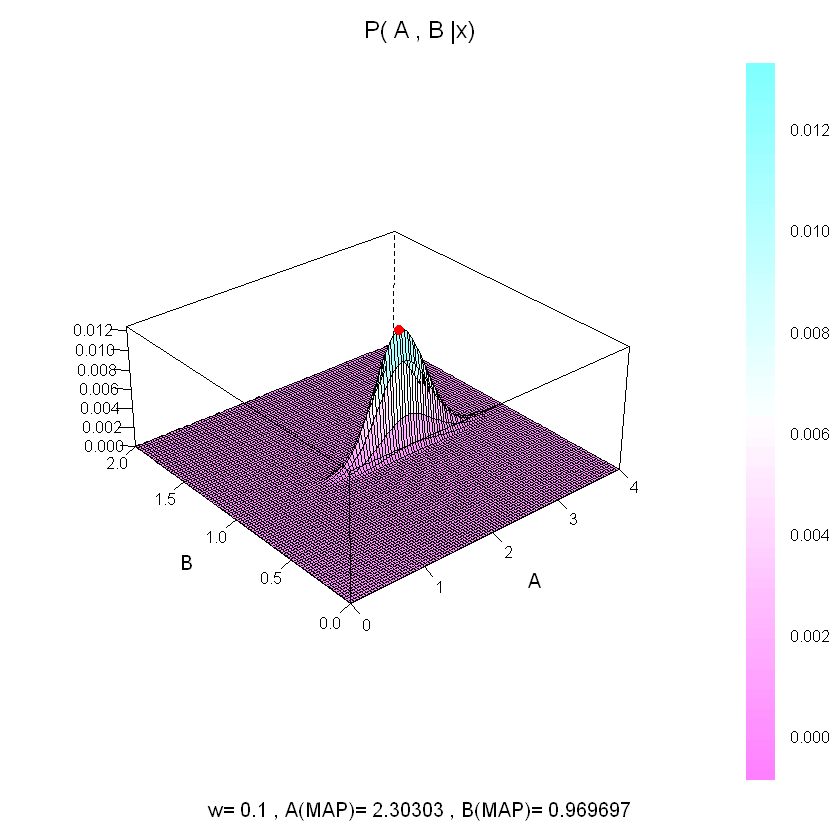

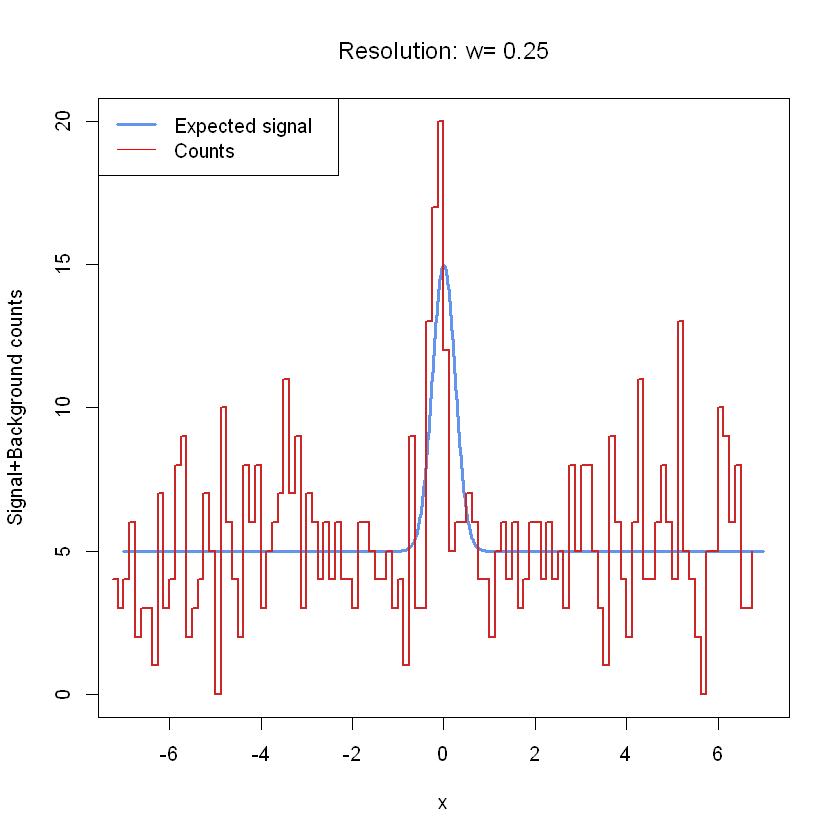

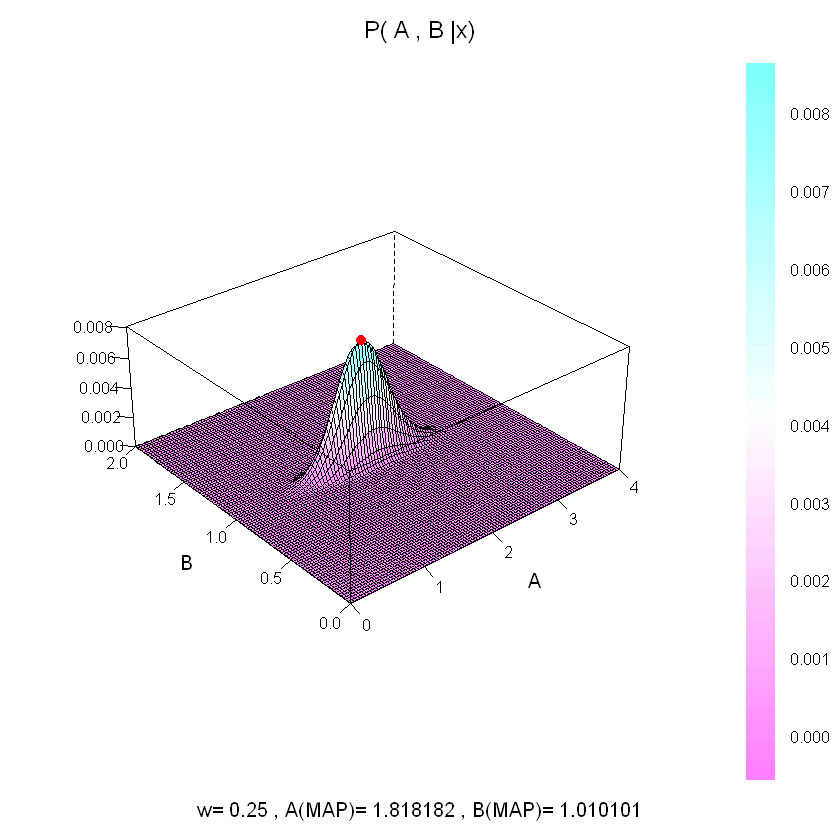

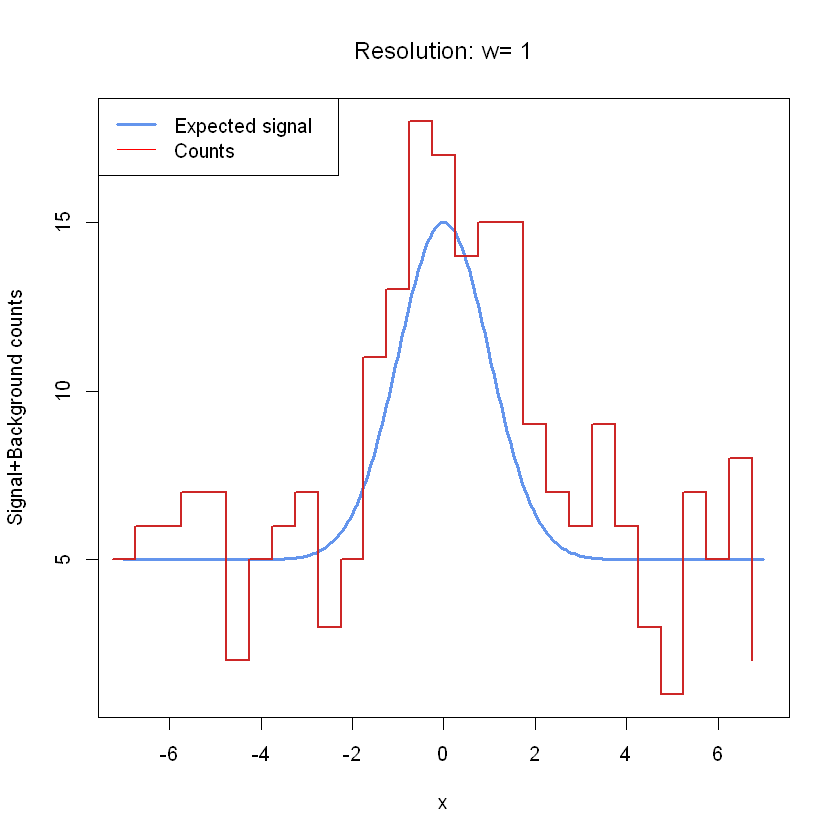

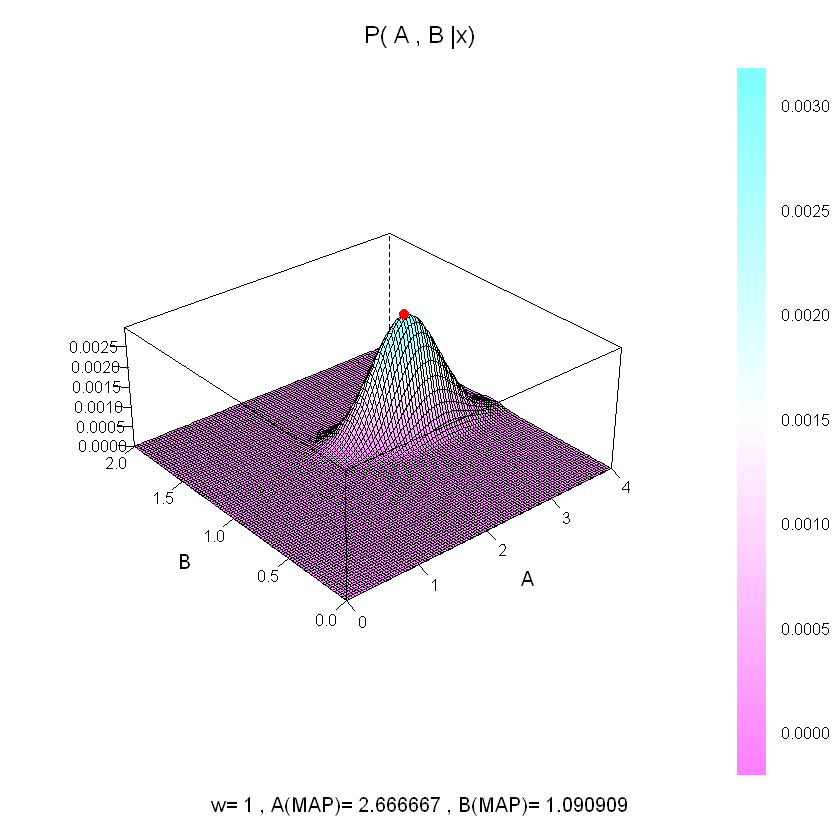

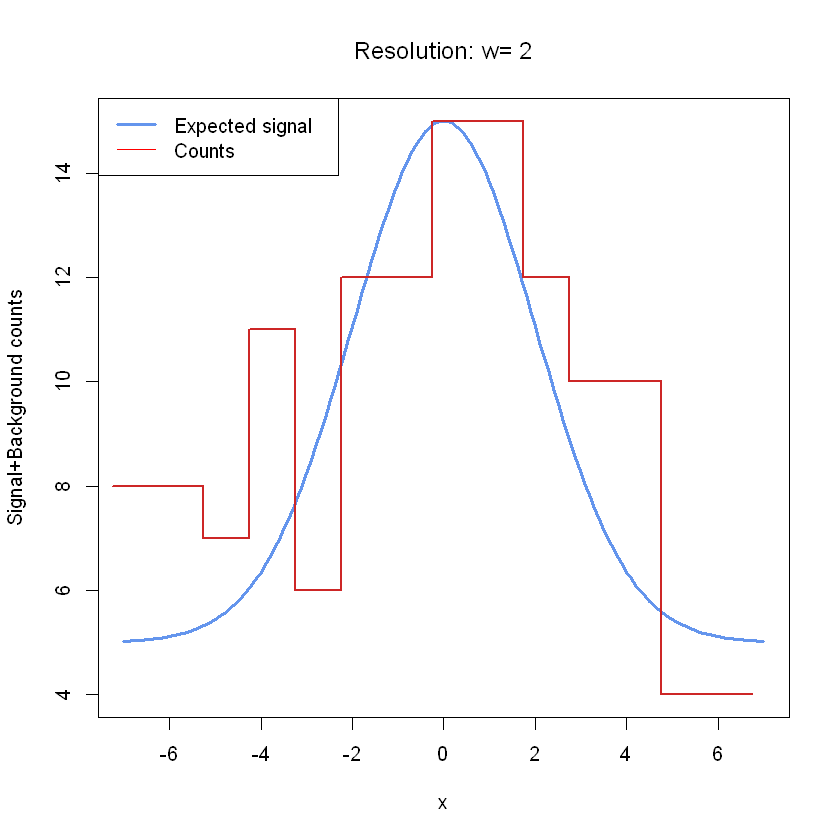

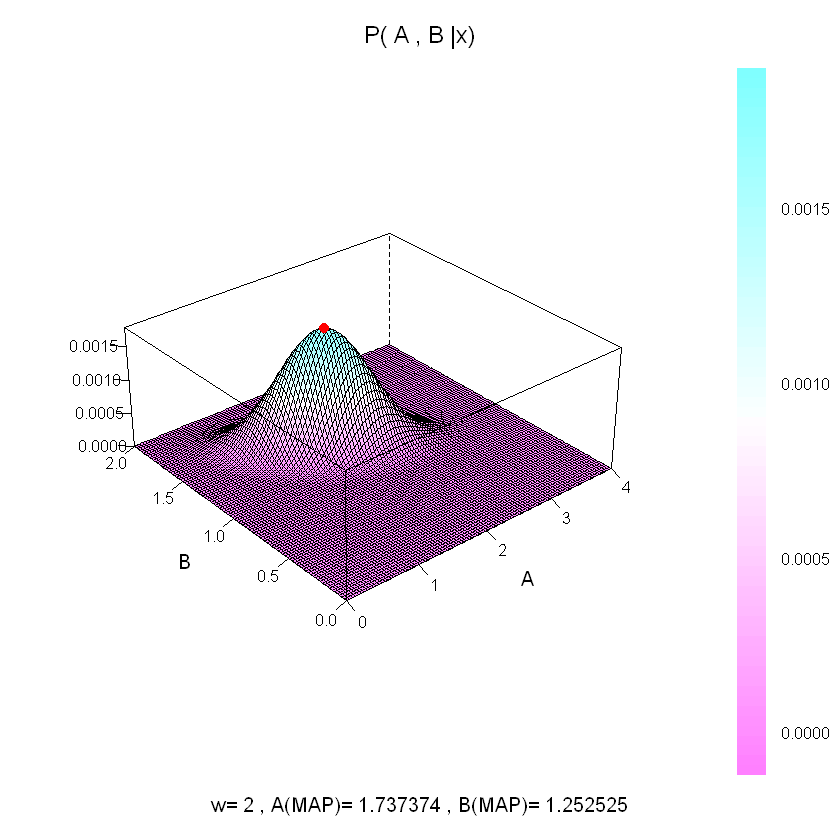

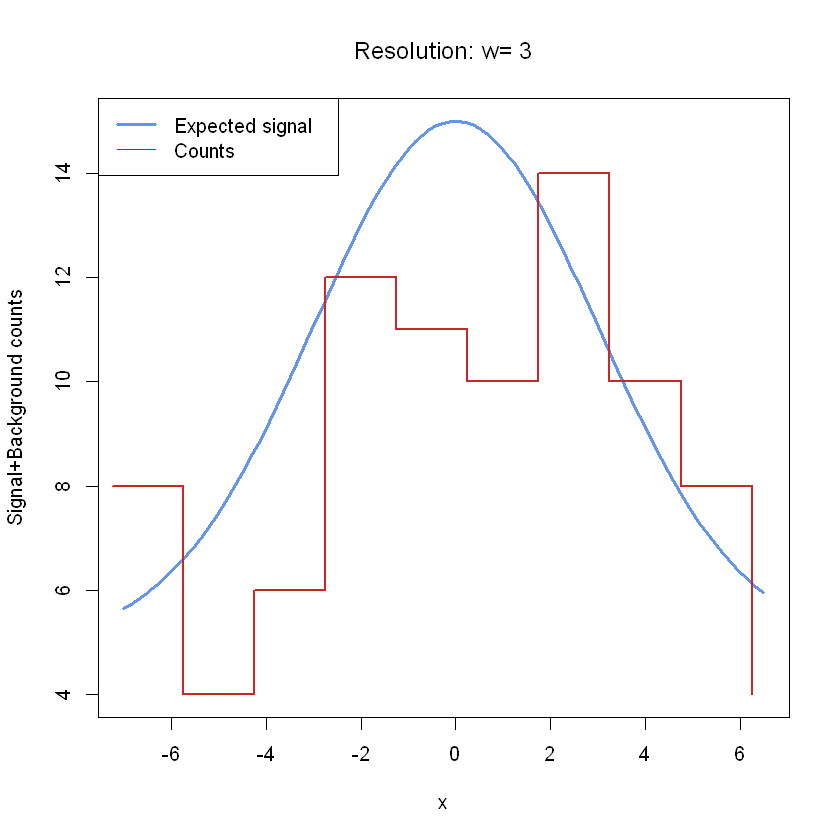

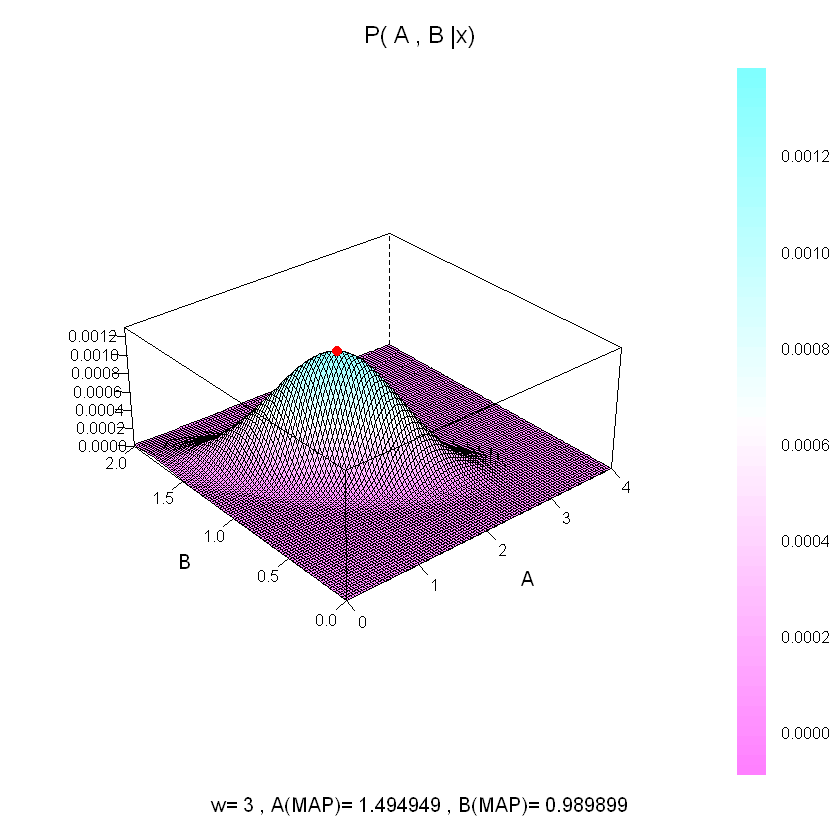

In [118]:
for (wd in w){
    # generating the datapoints for each value of the resolution
    xdat <- seq(from=-7*samp_width, to=7*samp_width, by=0.5*wd)
    s_true <- signal(xdat, A_true, B_true, x_0, wd, deltat)
    ddat <- rpois(length(s_true), s_true) #actual signal+background
        
    #plotting for each resolution
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*wd)
    splot <- signal(xplot, A_true, B_true, x_0, wd, deltat)
    plot(xplot, splot, xlab="x", ylab="Signal+Background counts", type='l',
        col="cornflowerblue", lwd=3, main=bquote("Resolution: w="~.(wd)), xlim=range(xplot), ylim=range(c(ddat,splot)))
    xdat.off <- xdat-0.25
    lines(xdat.off, ddat, type="s",col="firebrick3", lwd=2)
    legend("topleft", legend=c("Expected signal","Counts"),
          lty=c(1,1), col=c("cornflowerblue","red"), lwd=c(3,1))
    
    #grid of values for both a and b
    amin <- 0
    amax <- 4
    bmin <- 0
    bmax <- 2
    
    arange <- seq(amin, amax, leng=100)
    brange <- seq(bmin, bmax, leng=100)

    #creating a dataframe in order to use 'lattice' for the plots
    dat <- expand.grid(x = arange, y = brange)
    dat$z <- exp(log_post(a=dat$x, b=dat$y, w=wd))
    norm <- sum(dat$z)
    dat$z <- dat$z/norm
    names(dat) <- c('x','y','z')
    
    #calculating the maximum posterior
    max_post <- which.max(dat$z)
    a_max <- dat[max_post,1]
    b_max <- dat[max_post,2]
    #cat("A (MAP) =", a_max)
    #cat("\nB (MAP) =", b_max)
    
    #all the data about the maximum
    pts <- dat[max_post,]

    #plotting a wireframe with the maximum superimposed as a red dot
    g <- wireframe(z ~ x * y, dat,
            xlab=bquote(A), ylab = bquote(B), zlab="",
            main=bquote("P("~A~','~B~"|x)"), sub=bquote("w="~.(wd)~", A(MAP)="~.(a_max)~", B(MAP)="~.(b_max)),
            drape = T, 
            aspect = c(1, .4), 
            scales = list( arrows = FALSE, col="black"),
        par.settings = list(axis.line = list(col = 'transparent')),
              pts = pts,
              panel.3d.wireframe =
              function(x, y, z,
                       xlim, ylim, zlim,
                       xlim.scaled, ylim.scaled, zlim.scaled,
                       pts,
                       ...) {
                  panel.3dwire(x = x, y = y, z = z,
                               xlim = xlim,
                               ylim = ylim,
                               zlim = zlim,
                               xlim.scaled = xlim.scaled,
                               ylim.scaled = ylim.scaled,
                               zlim.scaled = zlim.scaled,
                               ...)
                  xx <- xlim.scaled[1] + diff(xlim.scaled) *
                          (pts$x - xlim[1]) / diff(xlim)
                  yy <- ylim.scaled[1] + diff(ylim.scaled) *
                          (pts$y - ylim[1]) / diff(ylim)
                  zz <- zlim.scaled[1] + diff(zlim.scaled) *
                          (pts$z - zlim[1]) / diff(zlim)
                  panel.3dscatter(x = xx,
                                  y = yy,
                                  z = zz,
                                  xlim = xlim,
                                  ylim = ylim,
                                  zlim = zlim,
                                  xlim.scaled = xlim.scaled,
                                  ylim.scaled = ylim.scaled,
                                  zlim.scaled = zlim.scaled,
                                  pch=19, cex=1, col.point='red',
                                  ...)
              })
    print(g)
}

The results seem to show that the best predictions are obtained for smaller values of $w$, corresponding to bigger resolutions.

###### Varying the ratio $\frac{A}{B}$

In [120]:
#changing the ratio between A and B

# fixed parameters
x_0 <- 0                    #signal peak
w <- 1                      #signal width
A_true <- 2                 #signal amplitude
B_true <- c(0.1,0.25,1,2,3) #background amplitudes
deltat <- 5                 #exposure time
samp_width <- 1

In [121]:
# creating the signal
signal <- function(x, a, b, x_0, w, deltat){
    return(deltat*(a*exp(-(x-x_0)**2/(2*w*w))+b))
}

#calculating the log posterior
log_posterior <- function(d, x, a, b, x_0, w, deltat){
    if(a<0 || b<0){return(-Inf)}
    sum(dpois(d, lambda=signal(x, a, b, x_0, w, deltat), log=TRUE))
}

log_post <- Vectorize(function(a,b) log_posterior(ddat, xdat, a, b, x_0, w, deltat))

In [122]:
#setting the seed
set.seed(1206078)

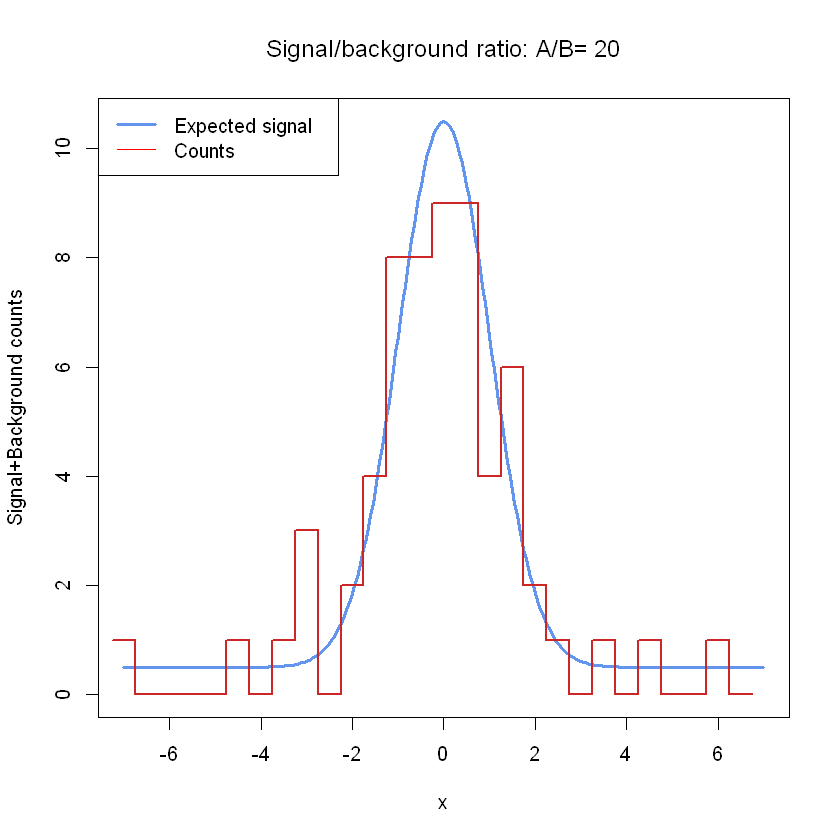

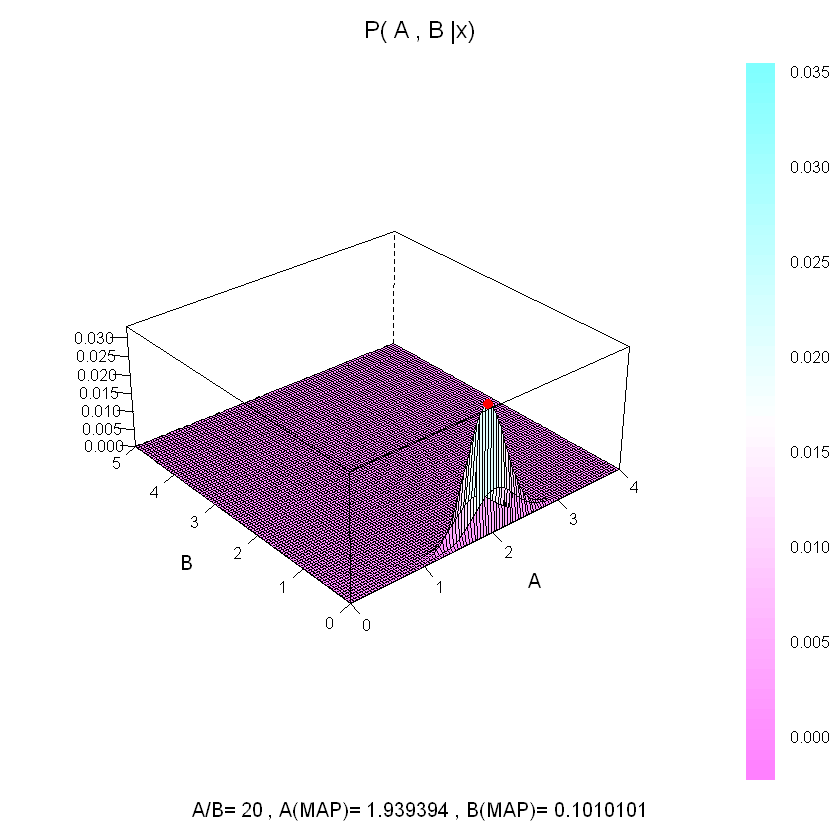

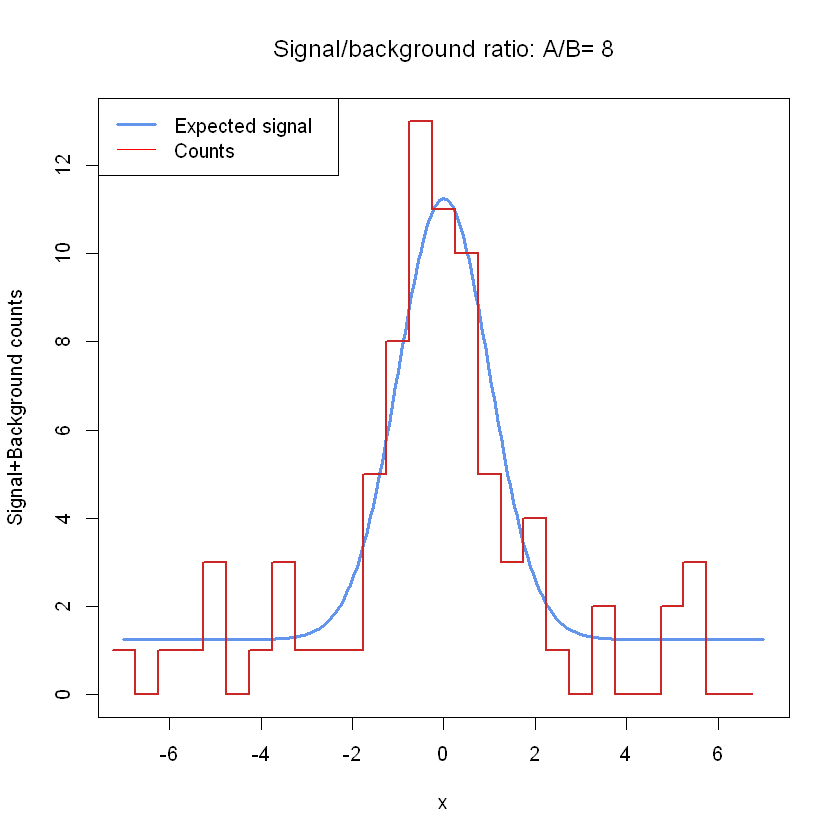

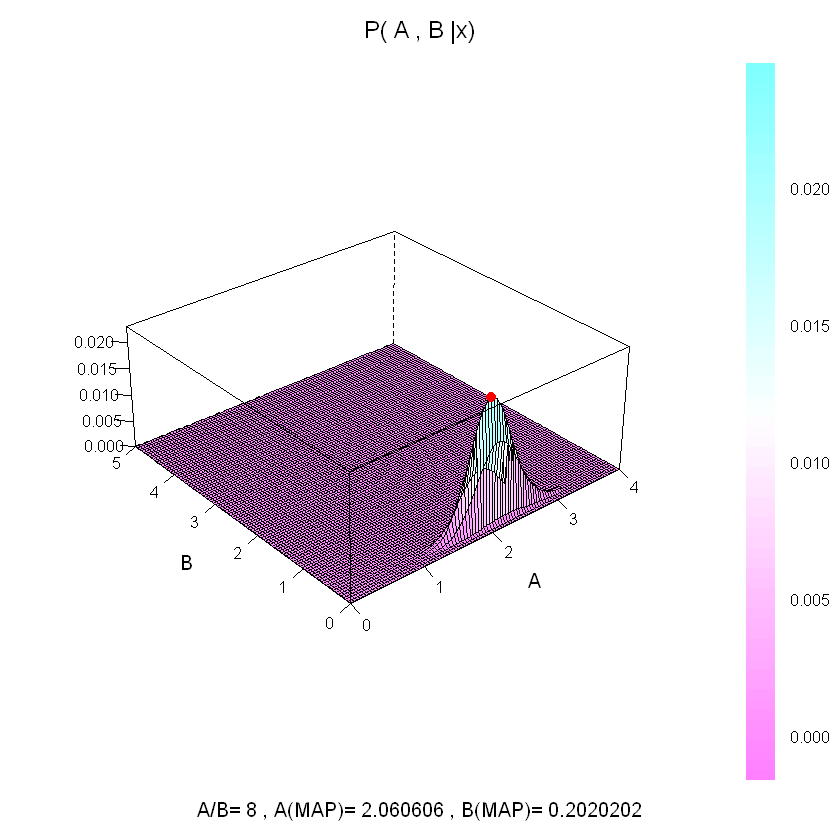

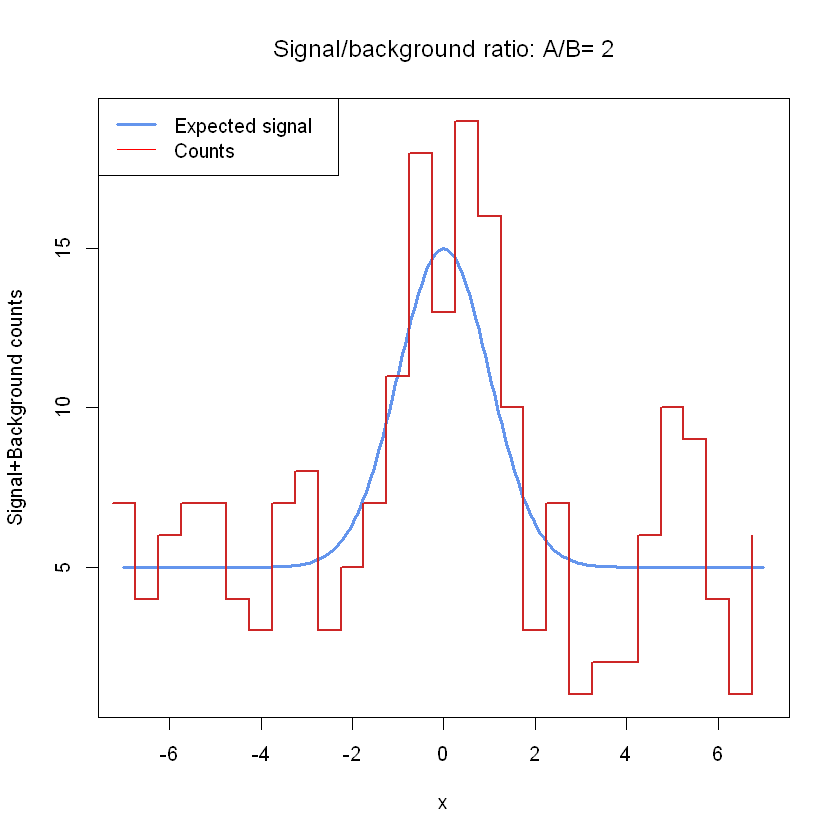

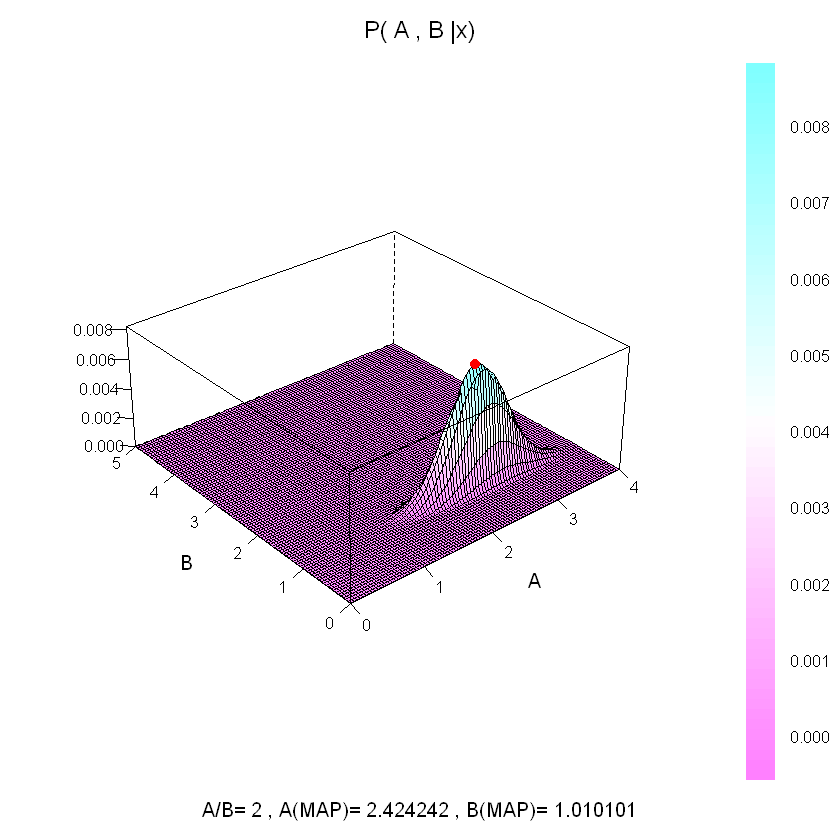

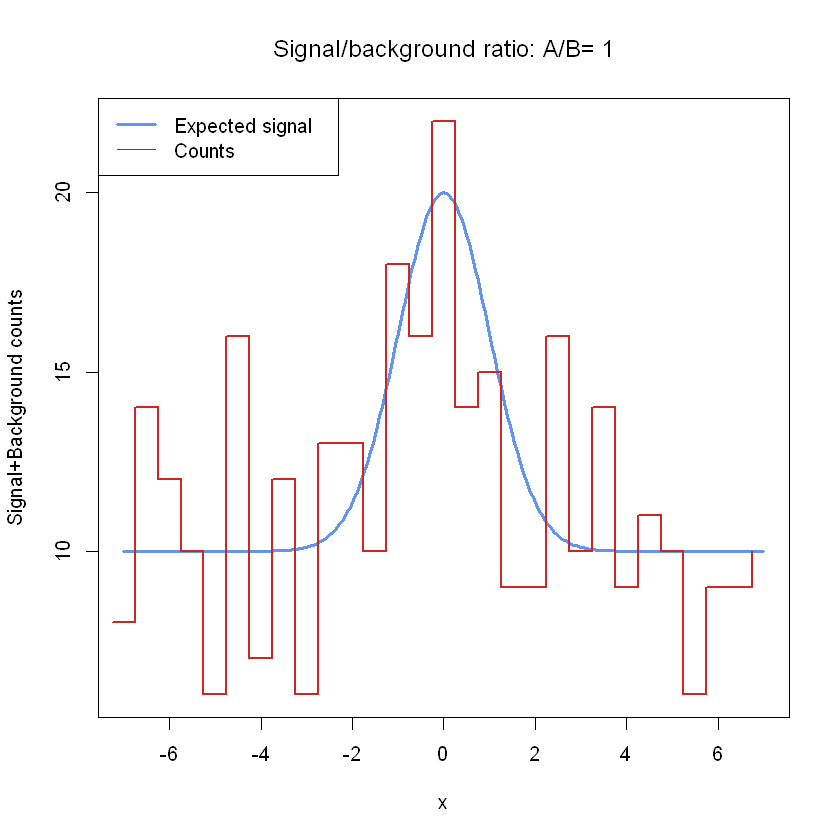

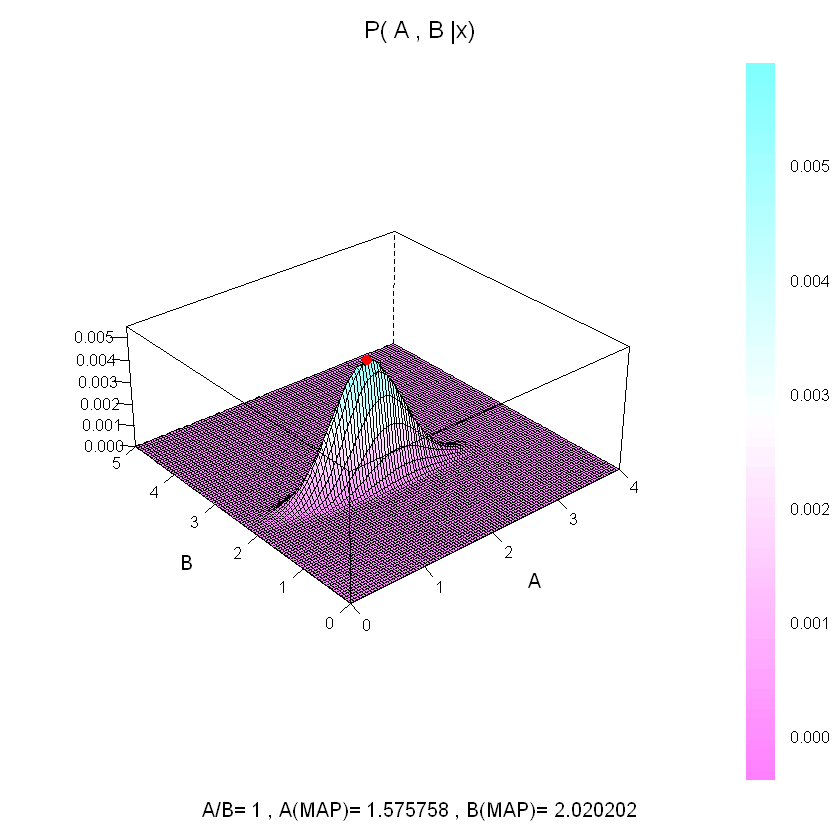

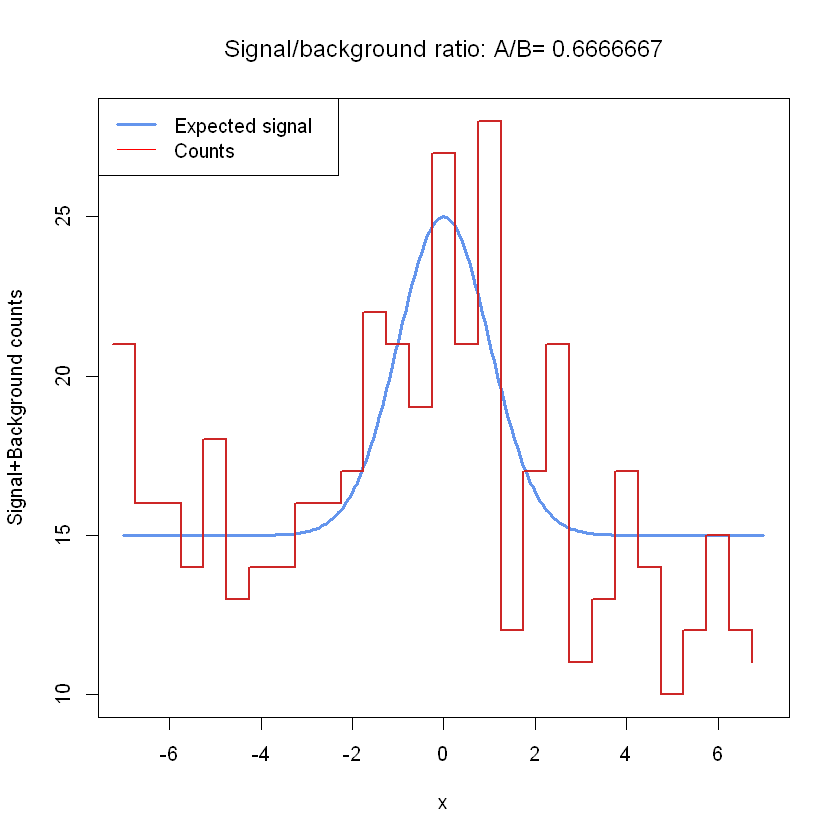

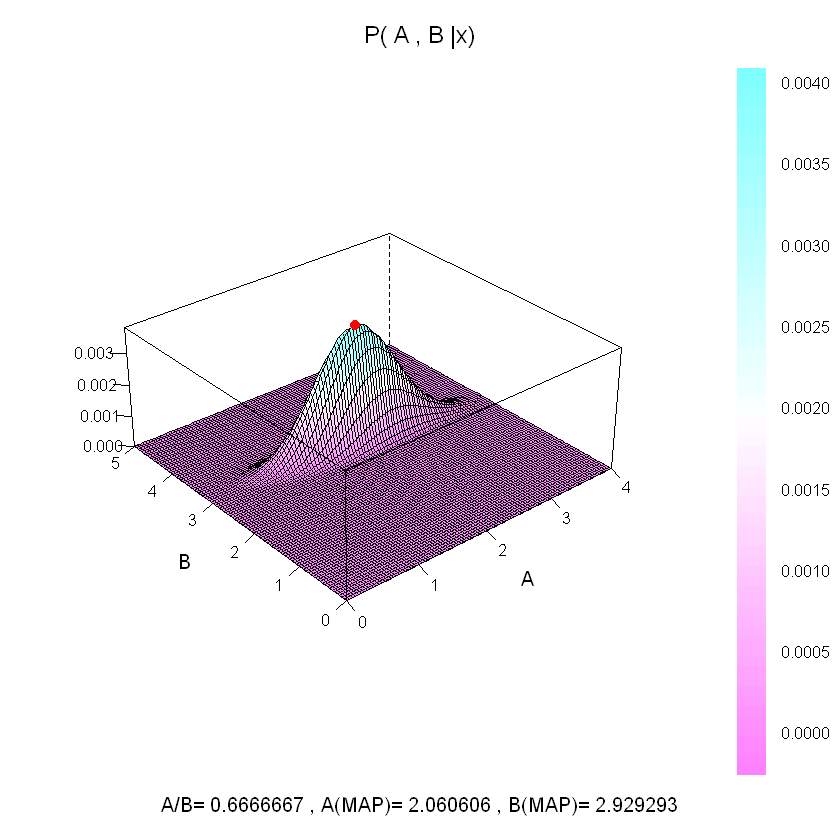

In [124]:
for (B in B_true){
    # generating the datapoints for each value of the resolution
    xdat <- seq(from=-7*samp_width, to=7*samp_width, by=0.5*w)
    s_true <- signal(xdat, A_true, B, x_0, w, deltat)
    ddat <- rpois(length(s_true), s_true) #actual signal+background
        
    #plotting for each resolution
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w)
    splot <- signal(xplot, A_true, B, x_0, w, deltat)
    plot(xplot, splot, xlab="x", ylab="Signal+Background counts", type='l',
        col="cornflowerblue", lwd=3, main=bquote("Signal/background ratio: A/B="~.(A_true/B)), xlim=range(xplot), ylim=range(c(ddat,splot)))
    xdat.off <- xdat-0.25
    lines(xdat.off, ddat, type="s", col="firebrick3", lwd=2)
    legend("topleft", legend=c("Expected signal","Counts"),
          lty=c(1,1), col=c("cornflowerblue","red"), lwd=c(3,1))
    
    #grid of values for both a and b
    amin <- 0
    amax <- 4
    bmin <- 0
    bmax <- 5
    
    arange <- seq(amin, amax, leng=100)
    brange <- seq(bmin, bmax, leng=100)

    #creating a dataframe in order to use 'lattice' for the plots
    dat <- expand.grid(x = arange, y = brange)
    dat$z <- exp(log_post(a=dat$x, b=dat$y))
    norm <- sum(dat$z)
    dat$z <- dat$z/norm
    names(dat) <- c('x','y','z')
    
    #calculating the maximum posterior
    max_post <- which.max(dat$z)
    a_max <- dat[max_post,1]
    b_max <- dat[max_post,2]
    #cat("A (MAP) =", a_max)
    #cat("\nB (MAP) =", b_max)
    
    #all the data about the maximum
    pts <- dat[max_post,]

    #plotting a wireframe with the maximum superimposed as a red dot
    g <- wireframe(z ~ x * y, dat,
            xlab=bquote(A), ylab = bquote(B), zlab="",
            main=bquote("P("~A~','~B~"|x)"), sub=bquote("A/B="~.(A_true/B)~", A(MAP)="~.(a_max)~", B(MAP)="~.(b_max)),
            drape = T, 
            aspect = c(1, .4), 
            scales = list( arrows = FALSE, col="black"),
        par.settings = list(axis.line = list(col = 'transparent')),
              pts = pts,
              panel.3d.wireframe =
              function(x, y, z,
                       xlim, ylim, zlim,
                       xlim.scaled, ylim.scaled, zlim.scaled,
                       pts,
                       ...) {
                  panel.3dwire(x = x, y = y, z = z,
                               xlim = xlim,
                               ylim = ylim,
                               zlim = zlim,
                               xlim.scaled = xlim.scaled,
                               ylim.scaled = ylim.scaled,
                               zlim.scaled = zlim.scaled,
                               ...)
                  xx <- xlim.scaled[1] + diff(xlim.scaled) *
                          (pts$x - xlim[1]) / diff(xlim)
                  yy <- ylim.scaled[1] + diff(ylim.scaled) *
                          (pts$y - ylim[1]) / diff(ylim)
                  zz <- zlim.scaled[1] + diff(zlim.scaled) *
                          (pts$z - zlim[1]) / diff(zlim)
                  panel.3dscatter(x = xx,
                                  y = yy,
                                  z = zz,
                                  xlim = xlim,
                                  ylim = ylim,
                                  zlim = zlim,
                                  xlim.scaled = xlim.scaled,
                                  ylim.scaled = ylim.scaled,
                                  zlim.scaled = zlim.scaled,
                                  pch=19, cex=1, col.point='red',
                                  ...)
              })
    print(g)
}

The results seem to show that the prediction gets worse as the ratio between $A$ and $B$ approaches 1.